In [1]:
import pandas as pd

In [2]:
# 读取数据
data=pd.read_excel('./超市营业额2.xlsx','Sheet1')

In [3]:
# 重复的数据
data[data.duplicated()]

,工号,姓名,日期,时段,交易额,柜台
104,1006,钱八,2019-03-13,14：00-21：00,1609.0,蔬菜水果


In [4]:
# 删除重复数据
data1=data.drop_duplicates()

In [5]:
data1.head(105)
# 可以看出重复的的数据(index为104)已经被删除

,工号,姓名,日期,时段,交易额,柜台
0,1001,张三,2019-03-01,9：00-14：00,1664.0,化妆品
1,1002,李四,2019-03-01,14：00-21：00,954.0,化妆品
2,1003,王五,2019-03-01,9：00-14：00,1407.0,食品
3,1004,赵六,2019-03-01,14：00-21：00,1320.0,食品
4,1005,周七,2019-03-01,9：00-14：00,994.0,日用品
...,...,...,...,...,...,...
100,1004,赵六,2019-03-13,9：00-14：00,1130.0,化妆品
101,1005,周七,2019-03-13,14：00-21：00,922.0,化妆品
102,1005,周七,2019-03-13,9：00-14：00,1047.0,蔬菜水果
103,1006,钱八,2019-03-13,14：00-21：00,1609.0,蔬菜水果


In [6]:
# 查看数据缺失情况 可以看出'交易额'列缺失三个元素
data.isnull().sum()

工号     0
姓名     0
日期     0
时段     0
交易额    3
柜台     0
dtype: int64

In [7]:
# 查看'交易额'列缺失的三个元素
t=data['交易额'].apply(pd.isnull)
data.loc[t,'交易额']

110   NaN
124   NaN
168   NaN
Name: 交易额, dtype: float64

In [8]:
# 对“交易额”缺失值使用均值进行填充
μ=data['交易额'].mean()
data2=data.fillna({'交易额':μ})
# 填充结果
data2['交易额'][[110,124,168]]

110    1330.313008
124    1330.313008
168    1330.313008
Name: 交易额, dtype: float64

In [9]:
# 使用3σ原则查看'交易额'中的异常值
σ=data['交易额'].std()
outlier=data['交易额'].apply(lambda x:x<μ-3*σ or x>μ+3*σ)
data.loc[outlier,'交易额']

105    12100.0
223     9031.0
Name: 交易额, dtype: float64

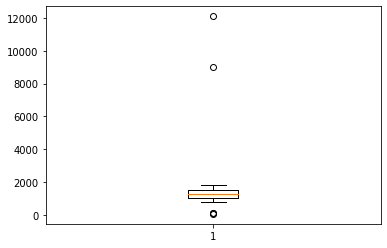

In [10]:
# 使用箱线图查看'交易额'中的异常值
import matplotlib.pyplot as plt
plt.boxplot(data2['交易额'])
plt.show()